In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import graphviz
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
menu = pd.read_csv("starbucks_drinkMenu_expanded.csv")
menu
menu.columns = ['Beverage_category','Beverage','Beverage_prep','Calories','Total Fat', 'Trans Fat', 'Saturated Fat', 'Sodium', 'Total Carbohydrates', 'Cholesterol', 'Dietary Fibre', 'Sugars', 'Protein', 'Vitamin A', 'Vitamin C', 'Calcium', 'Iron','Caffeine']

In [3]:
menu["Vitamin A"] = menu["Vitamin A"].str.replace("%","")
menu["Vitamin C"] = menu["Vitamin C"].str.replace("%","")
menu["Calcium"] = menu["Calcium"].str.replace("%","")
menu["Iron"] = menu["Iron"].str.replace("%","")

In [4]:
menu

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat,Trans Fat,Saturated Fat,Sodium,Total Carbohydrates,Cholesterol,Dietary Fibre,Sugars,Protein,Vitamin A,Vitamin C,Calcium,Iron,Caffeine
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0,75
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10,0,20,0,75
6,Classic Espresso Drinks,Caffè Latte,Soymilk,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6,0,20,8,75
7,Classic Espresso Drinks,Caffè Latte,Tall Nonfat Milk,100,0.2,0.2,0.0,5,120,15,0,14,10.0,15,0,30,0,75
8,Classic Espresso Drinks,Caffè Latte,2% Milk,150,6,3.0,0.2,25,135,15,0,14,10.0,15,0,30,0,75
9,Classic Espresso Drinks,Caffè Latte,Soymilk,110,4.5,0.5,0.0,0,105,10,1,6,8.0,10,0,30,15,75


In [5]:
menu["Vitamin A"].value_counts()

10    43
6     37
4     37
15    36
0     27
8     23
20    18
25    11
2      5
50     3
30     2
Name: Vitamin A, dtype: int64

In [6]:
menu["Vitamin A"] = menu["Vitamin A"].astype(np.int64)

In [7]:
menu["Vitamin C"].value_counts()

0      188
2       20
15       7
6        7
10       4
20       4
80       3
4        3
100      3
8        3
Name: Vitamin C, dtype: int64

In [8]:
menu["Vitamin C"] = menu["Vitamin C"].astype(np.int64)

In [10]:
menu["Calcium"].value_counts()

10    51
20    35
15    24
0     23
25    21
30    21
35    17
45    11
40     9
50     9
8      9
60     5
2      4
6      3
Name: Calcium, dtype: int64

In [11]:
menu["Calcium"] = menu["Calcium"].astype(np.int64)

In [12]:
menu["Iron"] = menu["Iron"].astype(float)

In [13]:
menu["Caffeine"].value_counts()

75        37
0         35
150       34
70        14
varies    12
95        11
Varies    10
110        9
130        7
120        6
25         6
90         4
175        4
180        3
15         3
50         3
55         3
80         3
10         3
125        3
145        3
30         3
170        3
20         3
85         3
140        3
100        3
165        2
235        1
260        1
105        1
300        1
225        1
65         1
410        1
330        1
Name: Caffeine, dtype: int64

In [14]:
varies_filter = menu["Caffeine"] == "varies"
V_filter = menu["Caffeine"] == "Varies"

In [15]:
menu2 = menu[~(varies_filter | V_filter)]
menu2.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat,Trans Fat,Saturated Fat,Sodium,Total Carbohydrates,Cholesterol,Dietary Fibre,Sugars,Protein,Vitamin A,Vitamin C,Calcium,Iron,Caffeine
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0.0,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0.0,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0.0,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0.0,75


In [16]:
pd.set_option('display.max_columns', None)

In [17]:
menu2["Caffeine"] = menu2["Caffeine"].astype(float)

/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
menu2.dtypes

Beverage_category       object
Beverage                object
Beverage_prep           object
Calories                 int64
Total Fat               object
Trans Fat              float64
Saturated Fat          float64
Sodium                   int64
Total Carbohydrates      int64
Cholesterol              int64
Dietary Fibre            int64
Sugars                   int64
Protein                float64
Vitamin A                int64
Vitamin C                int64
Calcium                  int64
Iron                   float64
Caffeine               float64
dtype: object

In [19]:
menu3 = pd.get_dummies(menu2, columns = ["Beverage_category", "Beverage", "Beverage_prep"], drop_first = True)

In [20]:
menu3

,Calories,Total Fat,Trans Fat,Saturated Fat,Sodium,Total Carbohydrates,Cholesterol,Dietary Fibre,Sugars,Protein,Vitamin A,Vitamin C,Calcium,Iron,Caffeine,Beverage_category_Coffee,Beverage_category_Frappuccino® Blended Coffee,Beverage_category_Frappuccino® Blended Crème,Beverage_category_Frappuccino® Light Blended Coffee,Beverage_category_Shaken Iced Beverages,Beverage_category_Signature Espresso Drinks,Beverage_category_Smoothies,Beverage_category_Tazo® Tea Drinks,Beverage_Brewed Coffee,Beverage_Caffè Americano,Beverage_Caffè Latte,Beverage_Caffè Mocha (Without Whipped Cream),Beverage_Cappuccino,Beverage_Caramel,Beverage_Caramel (Without Whipped Cream),Beverage_Caramel Apple Spice (Without Whipped Cream),Beverage_Caramel Macchiato,Beverage_Coffee,Beverage_Espresso,Beverage_Hot Chocolate (Without Whipped Cream),Beverage_Iced Brewed Coffee (With Classic Syrup),Beverage_Iced Brewed Coffee (With Milk & Classic Syrup),Beverage_Java Chip,Beverage_Java Chip (Without Whipped Cream),Beverage_Mocha,Beverage_Mocha (Without Whipped Cream),Beverage_Orange Mango Banana Smoothie,Beverage_Shaken Iced Tazo® Tea (With Classic Syrup),Beverage_Skinny Latte (Any Flavour),Beverage_Strawberries & Crème (Without Whipped Cream),Beverage_Strawberry Banana Smoothie,Beverage_Tazo® Chai Tea Latte,Beverage_Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),Beverage_Tazo® Green Tea Latte,Beverage_Vanilla Bean (Without Whipped Cream),Beverage_Vanilla Latte (Or Other Flavoured Latte),Beverage_White Chocolate Mocha (Without Whipped Cream),Beverage_prep_Doppio,Beverage_prep_Grande,Beverage_prep_Grande Nonfat Milk,Beverage_prep_Short,Beverage_prep_Short Nonfat Milk,Beverage_prep_Solo,Beverage_prep_Soymilk,Beverage_prep_Tall,Beverage_prep_Tall Nonfat Milk,Beverage_prep_Venti,Beverage_prep_Venti Nonfat Milk,Beverage_prep_Whole Milk
0,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0.0,175.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0.0,260.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0.0,410.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0.0,75.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10,0,20,0.0,75.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,70,2.5,0.4,0.0,0,65,6,1,4,5.0,6,0,20,8.0,75.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,100,0.2,0.2,0.0,5,120,15,0,14,10.0,15,0,30,0.0,75.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,150,6,3.0,0.2,25,135,15,0,14,10.0,15,0,30,0.0,75.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,110,4.5,0.5,0.0,0,105,10,1,6,8.0,10,0,30,15.0,75.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [41]:
menu3.dropna(inplace = True)

/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
menu3["Total Fat"].value_counts()

0.1    32
1.5    15
5      14
3      14
6      13
1      13
4      12
0.2    12
0      12
3.5    11
2.5    11
7      10
4.5     9
2       9
8       6
0.3     6
9       6
0.5     4
11      3
10      3
0.4     2
3 2     1
15      1
13      1
Name: Total Fat, dtype: int64

In [30]:
t_filter = menu3["Total Fat"] == "3 2"

In [31]:
menu3 = menu3[~t_filter]

In [32]:
menu3["Total Fat"] = menu3["Total Fat"].astype(float)

/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
x = menu3.drop(columns = ["Trans Fat"])
x.head()

,Calories,Total Fat,Saturated Fat,Sodium,Total Carbohydrates,Cholesterol,Dietary Fibre,Sugars,Protein,Vitamin A,Vitamin C,Calcium,Iron,Caffeine,Beverage_category_Coffee,Beverage_category_Frappuccino® Blended Coffee,Beverage_category_Frappuccino® Blended Crème,Beverage_category_Frappuccino® Light Blended Coffee,Beverage_category_Shaken Iced Beverages,Beverage_category_Signature Espresso Drinks,Beverage_category_Smoothies,Beverage_category_Tazo® Tea Drinks,Beverage_Brewed Coffee,Beverage_Caffè Americano,Beverage_Caffè Latte,Beverage_Caffè Mocha (Without Whipped Cream),Beverage_Cappuccino,Beverage_Caramel,Beverage_Caramel (Without Whipped Cream),Beverage_Caramel Apple Spice (Without Whipped Cream),Beverage_Caramel Macchiato,Beverage_Coffee,Beverage_Espresso,Beverage_Hot Chocolate (Without Whipped Cream),Beverage_Iced Brewed Coffee (With Classic Syrup),Beverage_Iced Brewed Coffee (With Milk & Classic Syrup),Beverage_Java Chip,Beverage_Java Chip (Without Whipped Cream),Beverage_Mocha,Beverage_Mocha (Without Whipped Cream),Beverage_Orange Mango Banana Smoothie,Beverage_Shaken Iced Tazo® Tea (With Classic Syrup),Beverage_Skinny Latte (Any Flavour),Beverage_Strawberries & Crème (Without Whipped Cream),Beverage_Strawberry Banana Smoothie,Beverage_Tazo® Chai Tea Latte,Beverage_Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),Beverage_Tazo® Green Tea Latte,Beverage_Vanilla Bean (Without Whipped Cream),Beverage_Vanilla Latte (Or Other Flavoured Latte),Beverage_White Chocolate Mocha (Without Whipped Cream),Beverage_prep_Doppio,Beverage_prep_Grande,Beverage_prep_Grande Nonfat Milk,Beverage_prep_Short,Beverage_prep_Short Nonfat Milk,Beverage_prep_Solo,Beverage_prep_Soymilk,Beverage_prep_Tall,Beverage_prep_Tall Nonfat Milk,Beverage_prep_Venti,Beverage_prep_Venti Nonfat Milk,Beverage_prep_Whole Milk
0,3,0.1,0.0,0,5,0,0,0,0.3,0,0,0,0.0,175.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,4,0.1,0.0,0,10,0,0,0,0.5,0,0,0,0.0,260.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,5,0.1,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,5,0.1,0.0,0,10,0,0,0,1.0,0,0,2,0.0,410.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,70,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0.0,75.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [25]:
x.dtypes

Calories                                                      int64
Total Fat                                                    object
Saturated Fat                                               float64
Sodium                                                        int64
Total Carbohydrates                                           int64
Cholesterol                                                   int64
Dietary Fibre                                                 int64
Sugars                                                        int64
Protein                                                     float64
Vitamin A                                                     int64
Vitamin C                                                     int64
Calcium                                                       int64
Iron                                                        float64
Caffeine                                                    float64
Beverage_category_Coffee                        

In [42]:
menu3["Caffeine"].value_counts(dropna = False)

75.0     37
150.0    34
0.0      34
70.0     14
95.0     11
110.0     9
130.0     7
25.0      6
120.0     6
175.0     4
90.0      4
85.0      3
180.0     3
10.0      3
20.0      3
30.0      3
50.0      3
170.0     3
145.0     3
80.0      3
125.0     3
55.0      3
15.0      3
140.0     3
100.0     3
165.0     2
260.0     1
330.0     1
410.0     1
65.0      1
225.0     1
300.0     1
235.0     1
105.0     1
Name: Caffeine, dtype: int64

In [44]:
y = menu3["Trans Fat"]
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.1
Name: Trans Fat, dtype: float64

In [36]:
x.describe()

,Calories,Total Fat,Saturated Fat,Sodium,Total Carbohydrates,Cholesterol,Dietary Fibre,Sugars,Protein,Vitamin A,Vitamin C,Calcium,Iron,Caffeine,Beverage_category_Coffee,Beverage_category_Frappuccino® Blended Coffee,Beverage_category_Frappuccino® Blended Crème,Beverage_category_Frappuccino® Light Blended Coffee,Beverage_category_Shaken Iced Beverages,Beverage_category_Signature Espresso Drinks,Beverage_category_Smoothies,Beverage_category_Tazo® Tea Drinks,Beverage_Brewed Coffee,Beverage_Caffè Americano,Beverage_Caffè Latte,Beverage_Caffè Mocha (Without Whipped Cream),Beverage_Cappuccino,Beverage_Caramel,Beverage_Caramel (Without Whipped Cream),Beverage_Caramel Apple Spice (Without Whipped Cream),Beverage_Caramel Macchiato,Beverage_Coffee,Beverage_Espresso,Beverage_Hot Chocolate (Without Whipped Cream),Beverage_Iced Brewed Coffee (With Classic Syrup),Beverage_Iced Brewed Coffee (With Milk & Classic Syrup),Beverage_Java Chip,Beverage_Java Chip (Without Whipped Cream),Beverage_Mocha,Beverage_Mocha (Without Whipped Cream),Beverage_Orange Mango Banana Smoothie,Beverage_Shaken Iced Tazo® Tea (With Classic Syrup),Beverage_Skinny Latte (Any Flavour),Beverage_Strawberries & Crème (Without Whipped Cream),Beverage_Strawberry Banana Smoothie,Beverage_Tazo® Chai Tea Latte,Beverage_Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),Beverage_Tazo® Green Tea Latte,Beverage_Vanilla Bean (Without Whipped Cream),Beverage_Vanilla Latte (Or Other Flavoured Latte),Beverage_White Chocolate Mocha (Without Whipped Cream),Beverage_prep_Doppio,Beverage_prep_Grande,Beverage_prep_Grande Nonfat Milk,Beverage_prep_Short,Beverage_prep_Short Nonfat Milk,Beverage_prep_Solo,Beverage_prep_Soymilk,Beverage_prep_Tall,Beverage_prep_Tall Nonfat Milk,Beverage_prep_Venti,Beverage_prep_Venti Nonfat Milk,Beverage_prep_Whole Milk
count,219.000000,219.00000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,218.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,200.534247,3.06484,0.039269,6.666667,136.347032,37.073059,0.840183,33.867580,7.280822,10.273973,3.721461,21.611872,8.004566,89.931193,0.018265,0.164384,0.054795,0.054795,0.059361,0.182648,0.036530,0.164384,0.018265,0.018265,0.054795,0.054795,0.054795,0.013699,0.041096,0.018265,0.054795,0.054795,0.009132,0.054795,0.013699,0.041096,0.013699,0.041096,0.013699,0.041096,0.013699,0.004566,0.018265,0.036530,0.013699,0.054795,0.054795,0.054795,0.018265,0.054795,0.054795,0.004566,0.018265,0.109589,0.013699,0.050228,0.004566,0.278539,0.022831,0.100457,0.018265,0.095890,0.073059
std,102.312987,3.00385,0.073018,8.822060,80.597528,20.869497,1.442167,19.896655,4.801414,8.214878,15.038179,14.563371,10.786288,64.589236,0.134214,0.371472,0.228100,0.228100,0.236840,0.387263,0.188034,0.371472,0.134214,0.134214,0.228100,0.228100,0.228100,0.116503,0.198967,0.134214,0.228100,0.228100,0.095344,0.228100,0.116503,0.198967,0.116503,0.198967,0.116503,0.198967,0.116503,0.067574,0.134214,0.188034,0.116503,0.228100,0.228100,0.228100,0.134214,0.228100,0.228100,0.067574,0.134214,0.313092,0.116503,0.218916,0.067574,0.449307,0.149707,0.301297,0.134214,0.295115,0.260830
min,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [53]:
y_train

5      2.0
10     0.2
32     2.5
96     6.0
229    0.1
226    2.0
197    3.5
36     0.5
206    3.0
45     1.5
228    4.0
194    2.5
183    0.2
175    0.3
112    0.1
147    0.3
165    0.2
142    0.1
41     0.0
48     1.5
79     3.5
23     4.5
37     0.2
200    1.5
126    1.0
82     5.0
13     0.3
177    0.4
182    1.5
60     0.2
      ... 
150    0.4
17     2.0
6      0.4
95     2.0
119    2.0
201    0.2
3      0.0
16     1.0
81     7.0
55     0.5
179    1.0
129    1.0
0      0.0
27     2.5
40     0.0
209    3.5
88     1.0
176    0.5
211    3.0
111    0.3
220    0.4
239    2.0
238    0.1
91     1.5
109    0.1
106    0.1
148    0.1
207    0.3
67     1.0
8      3.0
Name: Trans Fat, Length: 174, dtype: float64

In [71]:
reg8= DecisionTreeRegressor(max_depth = 8)
reg8= reg8.fit(x_train, y_train)

In [72]:
predictions_8 = reg8.predict(x_test)
predictions_8

array([0.4       , 0.        , 0.1       , 0.        , 0.        ,
       0.1       , 0.5       , 0.1       , 1.96153846, 0.5       ,
       0.5       , 0.5       , 0.4       , 3.5       , 0.4       ,
       0.        , 1.        , 0.2       , 0.1       , 0.5       ,
       1.        , 1.        , 0.3       , 7.        , 0.1       ,
       2.5       , 1.96153846, 0.45      , 0.5       , 0.1       ,
       1.        , 3.        , 2.5       , 3.        , 2.        ,
       1.        , 1.        , 0.1       , 0.        , 0.        ,
       0.1       , 0.1       , 2.5       , 0.1       ])

In [73]:
mean_squared_error(predictions_8, y_test)

0.49765902366863907

In [75]:
mean_squared_error(preds3_train, y_train)

0.312011602281566

In [76]:
preds8_train = reg8.predict(x_train)

In [77]:
mean_squared_error(preds8_train, y_train)

0.0016710875331564985

In [58]:
reg3= DecisionTreeRegressor(max_depth = 3)
reg3= reg3.fit(x_train, y_train)

In [59]:
predictions_3 = reg3.predict(x_test)
predictions_3

array([0.59473684, 0.1       , 0.59473684, 0.1       , 0.1       ,
       0.1       , 0.59473684, 0.1       , 2.08333333, 1.54166667,
       1.54166667, 0.725     , 0.725     , 3.32142857, 0.725     ,
       0.1       , 0.725     , 0.59473684, 0.1       , 0.59473684,
       0.59473684, 0.59473684, 0.1       , 5.7       , 0.1       ,
       1.54166667, 2.08333333, 0.59473684, 0.725     , 0.1       ,
       0.59473684, 3.32142857, 2.08333333, 3.875     , 2.08333333,
       3.875     , 0.725     , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.1       , 3.32142857, 0.1       ])

In [60]:
mean_squared_error(predictions_3, y_test)

0.4332949176848192

In [61]:
preds3_train = reg3.predict(x_train)

In [67]:
mean_squared_error(preds3_train, y_train)

0.312011602281566

In [79]:
knn3 = KNeighborsRegressor(n_neighbors = 3)
knn3.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [89]:
y_test_pred = knn3.predict(x_test)

In [90]:
mean_squared_error(y_test_pred, y_test)

1.1292929292929292

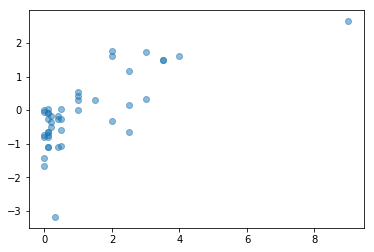

In [91]:
plt.scatter(y_test, y_test - y_test_pred, alpha = 0.5)

In [87]:
lm = smf.ols(" Trans Fat  ~  Calories +  Total Fat +  Saturated Fat ", data = menu3).fit()
lm.summary()

SyntaxError: invalid syntax (<unknown>, line 1)